In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.config.list_physical_devices("GPU")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

2025-04-07 10:46:47.247990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744048007.261996 2417550 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744048007.266152 2417550 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744048007.279188 2417550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744048007.279199 2417550 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744048007.279201 2417550 computation_placer.cc:177] computation placer alr

In [2]:
stars = pd.read_csv("filtered_df.csv")

In [3]:
stars

,Unnamed: 0,ID,RA,DEC,u,J378,J395,J410,J430,g,...,r,J660,i,J861,z,source_id,distance,teff,logg,feh
0,0,iDR4_3_SPLUS-n01s01_0000103,150.174918,-0.707248,18.740,18.459,18.448,17.774,17.745,17.453,...,16.996,16.980,16.879,16.901,16.827,3833200793478109056,2956.908,5777,4.27,-0.42
1,1,iDR4_3_SPLUS-n01s01_0000131,150.247784,-0.706343,17.961,17.558,17.396,16.941,16.960,16.798,...,16.554,16.562,16.524,16.524,16.539,3833206501490123136,5930.167,6567,3.82,-0.53
2,2,iDR4_3_SPLUS-n01s01_0000200,150.966743,-0.705547,15.611,15.151,14.939,14.678,14.615,14.520,...,14.258,14.280,14.260,14.275,14.282,3833170556908613632,2318.441,6683,3.81,-0.35
3,3,iDR4_3_SPLUS-n01s01_0000220,150.436039,-0.703092,18.197,17.862,17.809,17.216,17.137,16.870,...,16.442,16.429,16.330,16.303,16.302,3833159566087581952,2416.223,5847,4.08,-0.31
4,4,iDR4_3_SPLUS-n01s01_0000248,150.416858,-0.702641,17.883,17.665,17.523,16.867,16.799,16.354,...,15.785,15.730,15.615,15.545,15.541,3833158844533044608,1055.775,5280,4.49,-0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88846,88846,iDR4_3_STRIPE82-0170_0047436,358.244396,1.317788,19.305,18.934,18.974,18.284,18.290,17.842,...,17.396,17.389,17.272,17.259,17.256,2643254403037381504,2195.912,5637,4.32,-0.69
88847,88847,iDR4_3_STRIPE82-0170_0047656,358.443639,1.319673,16.436,16.126,15.978,15.280,15.189,14.780,...,14.282,14.243,14.105,14.102,14.067,2643243240419077120,697.070,5591,4.21,-0.12
88848,88848,iDR4_3_STRIPE82-0170_0048158,358.291405,1.288510,15.141,14.620,14.519,14.140,14.073,13.943,...,13.681,13.695,13.620,13.643,13.629,2643253342182144768,1459.259,6565,3.90,-0.65
88849,88849,iDR4_3_STRIPE82-0170_0048420,358.189227,1.301481,18.631,18.292,18.287,17.731,17.622,17.317,...,16.897,16.875,16.740,16.700,16.691,2643256915594919936,2145.682,5797,4.35,-0.59


In [4]:
stars['uJ378'] = stars.u - stars.J378
stars['uJ395'] = stars.u - stars.J395
stars['uJ410'] = stars.u - stars.J410
stars['uJ430'] = stars.u - stars.J430
stars['ug'] = stars.u - stars.g
stars['uJ515'] = stars.u - stars.J515
stars['ur'] = stars.u - stars.r
stars['uJ660'] = stars.u - stars.J660
stars['uJ861'] = stars.u - stars.J861
stars['uz'] = stars.u - stars.z
stars['ui'] = stars.u - stars.i

stars['J378J395'] = stars.J378 - stars.J395
stars['J378J410'] = stars.J378 - stars.J410
stars['J378J430'] = stars.J378 - stars.J430
stars['J378g'] = stars.J378 - stars.g
stars['J378J515'] = stars.J378 - stars.J515
stars['J378r'] = stars.J378 - stars.r
stars['J378J660'] = stars.J378 - stars.J660
stars['J378J861'] = stars.J378 - stars.J861
stars['J378z'] = stars.J378 - stars.z
stars['J378i'] = stars.J378 - stars.i

stars['J395J410'] = stars.J395 - stars.J410
stars['J395J430'] = stars.J395 - stars.J430
stars['J395g'] = stars.J395 - stars.g
stars['J395J515'] = stars.J395 - stars.J515
stars['J395r'] = stars.J395 - stars.r
stars['J395J660'] = stars.J395 - stars.J660
stars['J395J861'] = stars.J395 - stars.J861
stars['J395z'] = stars.J395 - stars.z
stars['J395i'] = stars.J395 - stars.i

stars['J410J430'] = stars.J410 - stars.J430
stars['J410g'] = stars.J410 - stars.g
stars['J410J515'] = stars.J410 - stars.J515
stars['J410r'] = stars.J410 - stars.r
stars['J410J660'] = stars.J410 - stars.J660
stars['J410J861'] = stars.J410 - stars.J861
stars['J410z'] = stars.J410 - stars.z
stars['J410i'] = stars.J410 - stars.i

stars['J430g'] = stars.J430 - stars.g
stars['J430J515'] = stars.J430 - stars.J515
stars['J430r'] = stars.J430 - stars.r
stars['J430J660'] = stars.J430 - stars.J660
stars['J430J861'] = stars.J430 - stars.J861
stars['J430z'] = stars.J430 - stars.z
stars['J430i'] = stars.J430 - stars.i

stars['gJ515'] = stars.g - stars.J515
stars['gr'] = stars.g - stars.r
stars['gJ660'] = stars.g - stars.J660
stars['gJ861'] = stars.g - stars.J861
stars['gz'] = stars.g - stars.z
stars['gi'] = stars.g - stars.i

stars['J515r'] = stars.J515 - stars.r
stars['J515J660'] = stars.J515 - stars.J660
stars['J515J861'] = stars.J515 - stars.J861
stars['J515z'] = stars.J515 - stars.z
stars['J515i'] = stars.J515 - stars.i

stars['rJ660'] = stars.r - stars.J660
stars['rJ861'] = stars.r - stars.J861
stars['rz'] = stars.r - stars.z
stars['ri'] = stars.r - stars.i

stars['J660J861'] = stars.J660 - stars.J861
stars['J660z'] = stars.J660 - stars.z
stars['J660i'] = stars.J660 - stars.i

stars['J861z'] = stars.J861 - stars.z
stars['J861i'] = stars.J861 - stars.i

stars['zi'] = stars.z - stars.i

In [5]:
X = stars[['uJ378','uJ395','uJ410','uJ430','ug','uJ515','ur','uJ660','uJ861','uz','ui',
           'J378J395','J378J410','J378J430','J378g','J378J515','J378r','J378J660','J378J861','J378z','J378i',
           'J395J410','J395J430','J395g','J395J515','J395r','J395J660','J395J861','J395z','J395i',
           'J410J430','J410g','J410J515','J410r','J410J660','J410J861','J410z','J410i',
           'J430g','J430J515','J430r','J430J660','J430J861','J430z','J430i',
           'gJ515','gr','gJ660','gJ861','gz','gi',
           'J515r','J515J660','J515J861','J515z','J515i',
           'rJ660','rJ861','rz','ri',
           'J660J861','J660z','J660i',
           'J861z','J861i',
           'zi']].values

Y = stars.teff.values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05, random_state=0)

In [7]:
Y_train

array([5223, 5375, 5730, ..., 4130, 5184, 5597])

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [9]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation='linear'))

ann.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [10]:
ann.fit(X_train,Y_train, batch_size=16, epochs=1000)

Epoch 1/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 5s 772us/step - accuracy: 0.0000e+00 - loss: 10971282.0000
Epoch 2/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 705us/step - accuracy: 0.0000e+00 - loss: 648928.1875
Epoch 3/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 692us/step - accuracy: 0.0000e+00 - loss: 22155.8867
Epoch 4/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 789us/step - accuracy: 0.0000e+00 - loss: 17230.7871
Epoch 5/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 735us/step - accuracy: 0.0000e+00 - loss: 16724.2949
Epoch 6/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 684us/step - accuracy: 0.0000e+00 - loss: 16401.5195
Epoch 7/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 664us/step - accuracy: 0.0000e+00 - loss: 15802.5381
Epoch 8/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 681us/step - accuracy: 0.0000e+00 - loss: 14927.3955
Epoch 9/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 682us/step - accuracy: 0.0000e+00 - loss: 14665.3740
Epoch 10/1000
5276/5276 ━━━━━━━━━━━━━━━━━━━━ 4s 667us/step - accuracy: 0.0000e+00 - loss: 14846.

In [11]:
# Save the trained ANN model in the new Keras format
ann.save("TEFFNetwork.keras")

# Save the StandardScaler
import joblib
joblib.dump(sc, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [12]:
Y_pred = ann.predict(X_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


In [13]:
Y_pred[:,0]-Y_test

array([  63.01513672,  -30.09472656, -152.1953125 , ..., -104.97558594,
        106.17724609,   85.20068359])

In [14]:
array = Y_pred[:,0]-Y_test

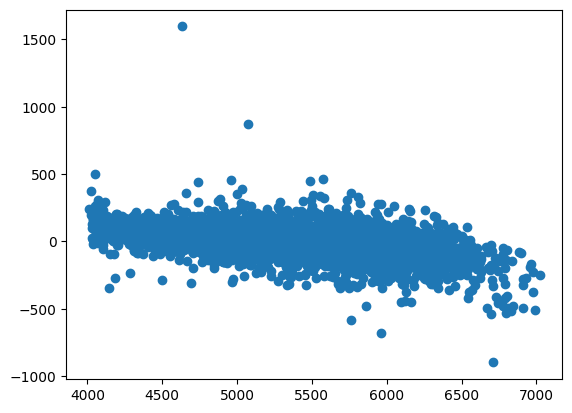

In [15]:
plt.scatter(Y_test,Y_pred[:,0] - Y_test)

In [16]:
# Compute residuals (differences)
residuals = Y_pred[:, 0] - Y_test

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))

print(f"Mean Absolute Distance from 0: {mae}")


Mean Absolute Distance from 0: 82.74119989265066


In [17]:
# Calculate residuals if not done already
residuals = Y_pred[:, 0] - Y_test

# Find the index of the residual closest to 2000
target_residual = 2000
closest_index = np.argmin(np.abs(residuals - target_residual))

# Retrieve the corresponding row from the test set
corresponding_row = stars.iloc[closest_index]

# Print the row and the corresponding residual value
print(corresponding_row)
print(f"Residual: {residuals[closest_index]}")


Unnamed: 0                            153
ID            iDR4_3_SPLUS-n01s01_0008417
RA                              150.30321
DEC                             -0.408735
u                                  19.962
                         ...             
J660z                               0.112
J660i                               0.174
J861z                              -0.042
J861i                                0.02
zi                                  0.062
Name: 153, Length: 87, dtype: object
Residual: 1596.02880859375


In [18]:
ls

'1st FDF COLOR Test.ipynb'
 1stBlindTest.ipynb
 1stBlindTestFull.ipynb
'2nd FDF COLOR Test.ipynb'
'3rd FDF COLOR Test.ipynb'
'4th FDF COLOR Test-Copy1.ipynb'
'4th FDF COLOR Test.ipynb'
'ANN INTO WORKING BU.ipynb'
'ANN INTRO OG.ipynb'
'ANN TESTS'/
 FDF64LOGG.ipynb
 FDF64feh.ipynb
'FDFfeh-(J861+J378).ipynb'
'FDFfeh-(r+378).ipynb'
'FDFfeh-(r+J861).ipynb'
 FDFfeh-J378.ipynb
 FDFfeh-J395.ipynb
 FDFfeh-J410.ipynb
 FDFfeh-J430.ipynb
 FDFfeh-J515.ipynb
 FDFfeh-J660.ipynb
 FDFfeh-J861.ipynb
 FDFfeh-g.ipynb
 FDFfeh-i.ipynb
 FDFfeh-r.ipynb
 FDFfeh-u.ipynb
 FDFfeh-z.ipynb
'FDFlogg-(J378+r).ipynb'
'FDFlogg-(J861+J378).ipynb'
'FDFlogg-(J861+r).ipynb'
 FDFlogg-J378.ipynb
 FDFlogg-J395.ipynb
 FDFlogg-J410.ipynb
 FDFlogg-J430.ipynb
 FDFlogg-J515.ipynb
 FDFlogg-J660.ipynb
 FDFlogg-J861.ipynb
 FDFlogg-g.ipynb
 FDFlogg-i.ipynb
 FDFlogg-r.ipynb
 FDFlogg-u.ipynb
 FDFlogg-z.ipynb
 FilteredGraphs.ipynb
 Filtered_df_RESIDUALFINDER.csv
 Filtered_df_RESIDUALFINDER2.csv
 Filtered_df_RESIDUALFINDER3.csv
 Full_Blin

In [19]:
import os
print(os.getcwd())

/home/jail/dlusers/agrimaldi12/Untitled Folder


In [20]:
from tensorflow.keras.models import load_model

# Go up one level to find the model
ann = load_model("../TEFFNetwork.keras")


In [21]:
import os

# Check if the file exists one level up
os.path.exists("../TEFFNetwork.keras")


True

In [22]:
import os

# Search all files and print those that end with .keras
for root, dirs, files in os.walk(".."):
    for name in files:
        if name.endswith(".keras"):
            print(os.path.join(root, name))


../TEFFNetwork_new.keras
../TEFFNetwork.keras
../stellar_teff_model.keras
../Untitled Folder/TEFFNetwork.keras
